In [1]:
import numpy as np
import matplotlib.pyplot as plt

# kinetic parameters with assumed units:
aM = 15.1745   # 1/hr, transcription rate per nM of free DNA: DA--> DA+M
aP = 1         # 1/hr, translation rate per nM of mRNA: M-->M+P
aF = 1         # 1/hr, conversion rate from protein to repressor: P-->P+F
bM = 1         # 1/hr, mRNA degradation rate: M--> ∅
bP = 1         # 1/hr, protein degradation rate : P--> ∅
bF = 1         # 1/hr, repressor degradation rate: F--> ∅
kf = 200       # 1/(nM·hr), binding rate constant for free DNA and repressor: DA+F--> DR
kb = 50        # 1/hr, unbinding rate constant for the DNA-repressor complex: DR--> DA+F
DT = 165    # nM, total DNA concentration

In [2]:
def propensity_functions(y, volume):
    """
    y = [DA, M, P, F, DR]
    Returns [rho1, rho2, ..., rho9] in the order of R1..R9 from Problem 1.
    """
    DA, M, P, F, DR = y
    #0, 1, 2, 3, 4

    # R1: DA -> DA + M
    rho1 = aM * DA
    # R2:  M -> ∅
    rho2 = bM * M
    # R3:  M -> M + P
    rho3 = aP * M
    # R4:  P -> ∅
    rho4 = bP * P
    # R5:  P -> P + F
    rho5 = aF * P
    # R6:  F -> ∅
    rho6 = bF * F
    # R7:  DA + F -> DR
    rho7 = kf * DA * F / volume
    # R8:  DR -> DA + F
    rho8 = kb * DR
    # R9:  DR -> DA   (repressor dissociation/degradation)
    rho9 = bF * DR

    return [rho1, rho2, rho3, rho4, rho5, rho6, rho7, rho8, rho9]






    #  DA, M, P, F, DR = y
#       0,  1, 2, 3,  4


t_max=40
t=0
# Lists to store values


np.random.seed(42)


volumes=[0.01,0.1,1,100,1000]
results={}

for volume in volumes:
  y=[165,0,0,0,0]
  t=0.0
  time=[t]
  da_list=[y[0]]
  m_list=[y[1]]
  p_list=[y[2]]
  f_list=[y[3]]
  dr_list=[y[4]]
  da_frac  = [y[0]/DT]


  while t<t_max:



    props=propensity_functions(y,volume)
    a0=sum(props) # total rate at which fastest reaction occurs
    if a0==0:
      break
    # time step ( to be sampled from exponential of rate a0)
    r1= np.random.rand() # r~U(0,1)
    tau= -np.log(r1)/a0 # exponential from uniform distribution
    t+=tau # updating time step

    # determine which reactions occur during Gillespie algorithm
    r2= np.random.rand()*a0 # r2~U(0,a0)
    cum=np.cumsum(props)

    if r2<cum[0]:
      # DA--> DA+M
      y[1]+=1
    elif r2<cum[1]:
      #M-->ø
      y[1]-=1
    elif r2<cum[2]:
      # M-->M+P
      y[2]+=1
    elif r2<cum[3]:
      # P--> ø
      y[2]-=1
    elif r2<cum[4]:
      #p-->P+F
      y[3]+=1
    elif r2<cum[5]:
      # F-->ø
      y[3]-=1
    elif r2<cum[6]:
      # DA+F --> DR
      y[0]-=1
      y[3]-=1
      y[4]+=1
    elif r2<cum[7]:
      # DR --> DA+F
      y[0]+=1
      y[3]+=1
      y[4]-=1
    else:
      # DR--> DA
      y[0]+=1
      y[4]-=1

    # Record states
    time.append(t)
    da_list.append(y[0])
    m_list.append(y[1])
    p_list.append(y[2])
    f_list.append(y[3])
    dr_list.append(y[4])
    da_frac.append(y[0]/DT)

  results[volume]= (time,m_list,da_frac)







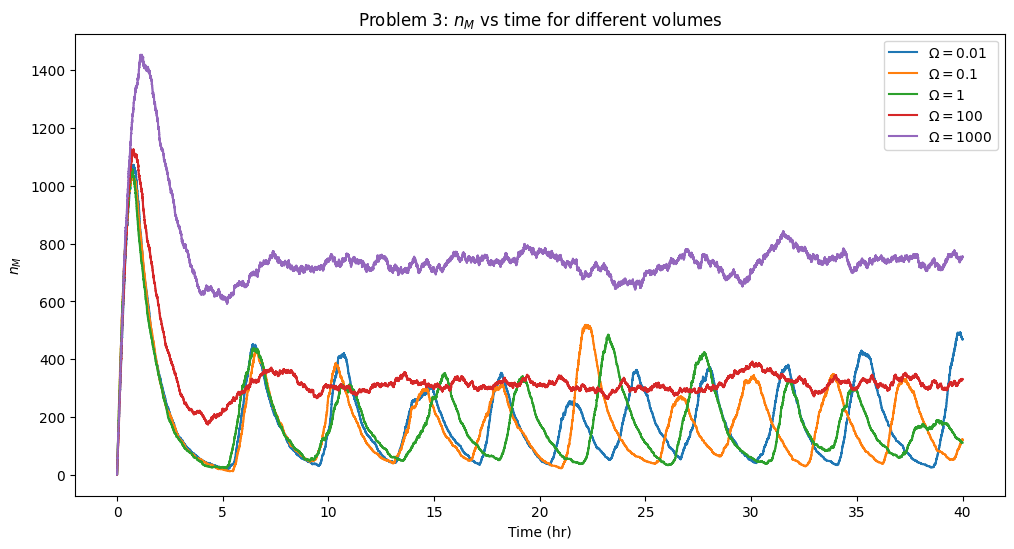

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for vol,(time,m_traj,da_traj) in results.items():
  plt.step(time, m_traj,     where='post', label=f'$Ω={vol}$')

plt.xlabel('Time (hr)')
plt.ylabel('$n_M$')
plt.title('Problem 3: $n_M$ vs time for different volumes')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


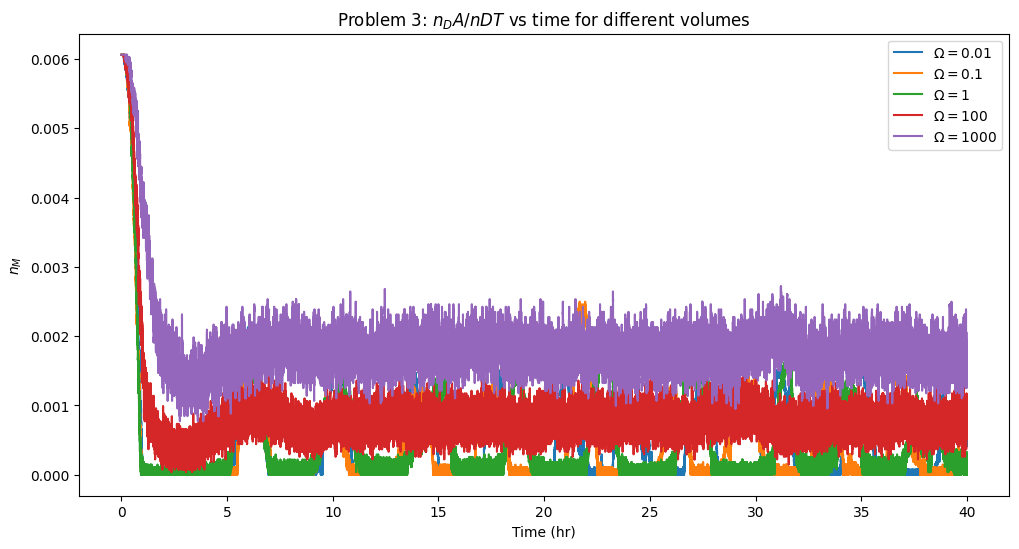

In [5]:
plt.figure(figsize=(12,6))

for vol,(time,m_traj,da_traj) in results.items():
  plt.step(time, np.array(da_traj)/DT,     where='post', label=f'$Ω={vol}$')

plt.xlabel('Time (hr)')
plt.ylabel('$n_M$')
plt.title('Problem 3: $n_DA/nDT$ vs time for different volumes')
plt.legend()
plt.show()